In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [24]:
ddf = pd.read_csv("/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/power.csv")
ddf.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [25]:
df = ddf.drop(['DateTime','Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1)
df

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620
1,6.414,74.5,0.083,0.070,0.085,29814.68354
2,6.313,74.5,0.080,0.062,0.100,29128.10127
3,6.121,75.0,0.083,0.091,0.096,28228.86076
4,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627
52412,6.947,72.6,0.082,0.051,0.093,30430.41825
52413,6.900,72.8,0.086,0.084,0.074,29590.87452
52414,6.758,73.0,0.080,0.066,0.089,28958.17490


In [26]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620
1,6.414,74.5,0.083,0.070,0.085,29814.68354
2,6.313,74.5,0.080,0.062,0.100,29128.10127
3,6.121,75.0,0.083,0.091,0.096,28228.86076
4,5.921,75.7,0.081,0.048,0.085,27335.69620


<Axes: xlabel='Zone 1 Power Consumption', ylabel='count'>

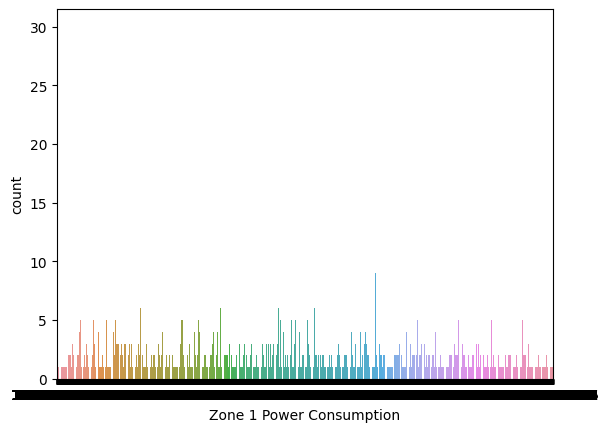

In [27]:
import seaborn as sns
sns.countplot(data=df,x="Zone 1 Power Consumption")

In [28]:
df.isnull().sum()

Temperature                 0
Humidity                    0
Wind Speed                  0
general diffuse flows       0
diffuse flows               0
Zone 1 Power Consumption    0
dtype: int64

In [29]:
X = df.drop('Zone 1 Power Consumption', axis=1)
y = df['Zone 1 Power Consumption']
Y = pd.get_dummies(y).values

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (5,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [32]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100


2023-06-03 22:13:41.033346: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1311/1311 [==============================] - 2s 2ms/step - loss: 6.6265 - mse: 6.6265 - val_loss: 0.3068 - val_mse: 0.3068
Epoch 2/100
1311/1311 [==============================] - 2s 1ms/step - loss: 1.5250 - mse: 1.5250 - val_loss: 0.1194 - val_mse: 0.1194
Epoch 3/100
1311/1311 [==============================] - 2s 1ms/step - loss: 0.3776 - mse: 0.3776 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 4/100
1311/1311 [==============================] - 2s 1ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 4.6784e-04 - val_mse: 4.6784e-04
Epoch 5/100
1311/1311 [==============================] - 2s 1ms/step - loss: 6.2247e-04 - mse: 6.2247e-04 - val_loss: 3.6248e-05 - val_mse: 3.6248e-05
Epoch 6/100
1311/1311 [==============================] - 2s 1ms/step - loss: 3.6433e-05 - mse: 3.6433e-05 - val_loss: 3.6367e-05 - val_mse: 3.6367e-05
Epoch 7/100
1311/1311 [==============================] - 2s 1ms/step - loss: 3.6790e-05 - mse: 3.6790e-05 - val_loss: 3.6153e-05 - val_mse: 3.6153e-05
Epoch 8/100

1311/1311 [==============================] - 2s 1ms/step - loss: 3.6313e-05 - mse: 3.6313e-05 - val_loss: 3.6321e-05 - val_mse: 3.6321e-05
Epoch 56/100
1311/1311 [==============================] - 2s 1ms/step - loss: 3.6313e-05 - mse: 3.6313e-05 - val_loss: 3.6324e-05 - val_mse: 3.6324e-05
Epoch 57/100
1311/1311 [==============================] - 2s 1ms/step - loss: 3.6313e-05 - mse: 3.6313e-05 - val_loss: 3.6312e-05 - val_mse: 3.6312e-05
Epoch 58/100
1311/1311 [==============================] - 2s 1ms/step - loss: 3.6313e-05 - mse: 3.6313e-05 - val_loss: 3.6315e-05 - val_mse: 3.6315e-05
Epoch 59/100
1311/1311 [==============================] - 2s 1ms/step - loss: 3.6313e-05 - mse: 3.6313e-05 - val_loss: 3.6310e-05 - val_mse: 3.6310e-05
Epoch 60/100
1311/1311 [==============================] - 2s 1ms/step - loss: 3.6313e-05 - mse: 3.6313e-05 - val_loss: 3.6315e-05 - val_mse: 3.6315e-05
Epoch 61/100
1311/1311 [==============================] - 2s 1ms/step - loss: 3.6313e-05 - mse: 3.631

In [33]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

328/328 [==============================] - 0s 655us/step - loss: 3.6313e-05 - mse: 3.6313e-05


In [34]:
test_mse_score

3.6313122109277174e-05

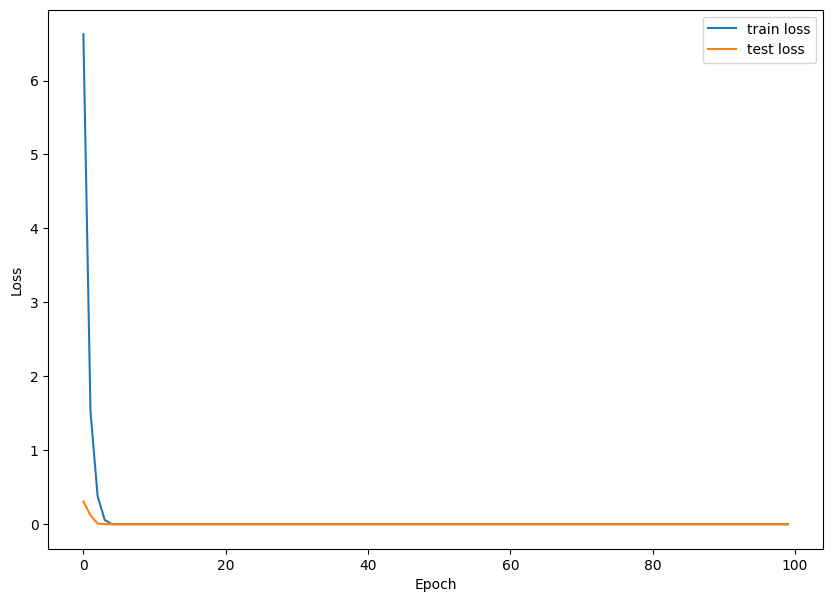

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

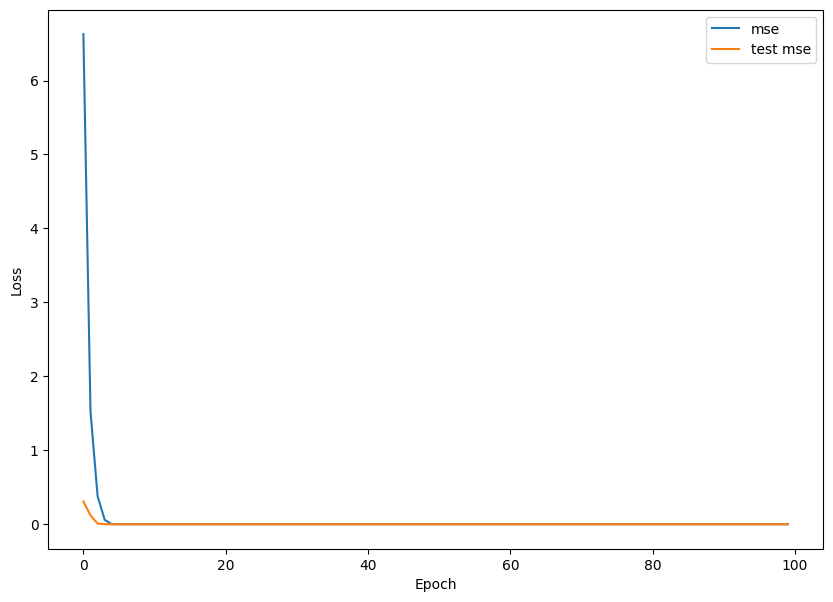

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()